In [1]:
import pandas as pd


In [4]:
df=pd.read_csv(r"C:\Allwin\fluidai\NSE_Data.csv")

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0
1,2016-01-05,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0
2,2016-01-06,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0
3,2016-01-07,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0
4,2016-01-08,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0


In [6]:
df.shape

(1481, 7)

In [58]:
df.isnull().sum()

Date         0
Open         6
High         6
Low          6
Close        0
Adj Close    6
Volume       6
dtype: int64

In [59]:
df2= df.reset_index()['Close']

In [60]:
df2.shape

(1481,)

In [57]:
df['Close']=df['Close'].fillna(df['Close'].mean())

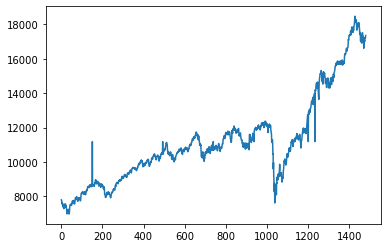

In [61]:
import matplotlib.pyplot as plt
plt.plot(df2)

In [62]:
import numpy as np

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df2= scaler.fit_transform(np.array(df2).reshape(-1,1))

In [64]:
df2.shape

(1481, 1)

In [65]:
training_size=int(len(df2)*0.65)
test_size=len(df2)-training_size
train_data,test_data=df2[0:training_size,:],df2[training_size:len(df2),:1]

In [66]:
def create_dataset(dataset, time_step=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+ time_step, 0])
    return np.array(dataX), np.array(dataY)

In [67]:
time_step= 100
X_train , y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [68]:
y_test

array([0.25110265, 0.20187806, 0.19423883, 0.19991397, 0.1936696 ,
       0.19822793, 0.19715898, 0.19345233, 0.20970408, 0.18877671,
       0.18826392, 0.16100968, 0.16586344, 0.18215432, 0.18560458,
       0.17978176, 0.17889528, 0.20374225, 0.21896409, 0.22680319,
       0.24816952, 0.26146199, 0.26862755, 0.26580738, 0.27563237,
       0.27783112, 0.26733268, 0.27337277, 0.25476144, 0.26092323,
       0.2470875 , 0.25580433, 0.25294944, 0.27124353, 0.28451869,
       0.29032411, 0.30421196, 0.28981132, 0.28838609, 0.29656407,
       0.29042842, 0.2895332 , 0.30065307, 0.31122543, 0.3160618 ,
       0.32964555, 0.33277423, 0.32461356, 0.33397354, 0.3300279 ,
       0.33303928, 0.3160618 , 0.3170048 , 0.32758582, 0.34164315,
       0.35211554, 0.36428696, 0.36171011, 0.36891047, 0.36705935,
       0.3616406 , 0.37630628, 0.36781538, 0.35906383, 0.35656956,
       0.34076533, 0.35846414, 0.35902038, 0.3675808 , 0.36878876,
       0.37366434, 0.37821393, 0.37698856, 0.37629763, 0.36569

In [69]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [70]:
y_test

array([0.25110265, 0.20187806, 0.19423883, 0.19991397, 0.1936696 ,
       0.19822793, 0.19715898, 0.19345233, 0.20970408, 0.18877671,
       0.18826392, 0.16100968, 0.16586344, 0.18215432, 0.18560458,
       0.17978176, 0.17889528, 0.20374225, 0.21896409, 0.22680319,
       0.24816952, 0.26146199, 0.26862755, 0.26580738, 0.27563237,
       0.27783112, 0.26733268, 0.27337277, 0.25476144, 0.26092323,
       0.2470875 , 0.25580433, 0.25294944, 0.27124353, 0.28451869,
       0.29032411, 0.30421196, 0.28981132, 0.28838609, 0.29656407,
       0.29042842, 0.2895332 , 0.30065307, 0.31122543, 0.3160618 ,
       0.32964555, 0.33277423, 0.32461356, 0.33397354, 0.3300279 ,
       0.33303928, 0.3160618 , 0.3170048 , 0.32758582, 0.34164315,
       0.35211554, 0.36428696, 0.36171011, 0.36891047, 0.36705935,
       0.3616406 , 0.37630628, 0.36781538, 0.35906383, 0.35656956,
       0.34076533, 0.35846414, 0.35902038, 0.3675808 , 0.36878876,
       0.37366434, 0.37821393, 0.37698856, 0.37629763, 0.36569

In [71]:
import tensorflow

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [73]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [74]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 24s 579ms/step - loss: 0.0244 - val_loss: 0.0851
Epoch 2/100
14/14 [==============================] - 5s 346ms/step - loss: 0.0044 - val_loss: 0.0239
Epoch 3/100
14/14 [==============================] - 5s 326ms/step - loss: 0.0020 - val_loss: 0.0164
Epoch 4/100
14/14 [==============================] - 5s 344ms/step - loss: 0.0012 - val_loss: 0.0109
Epoch 5/100
14/14 [==============================] - 5s 343ms/step - loss: 6.8130e-04 - val_loss: 0.0038
Epoch 6/100
14/14 [==============================] - 5s 326ms/step - loss: 5.2223e-04 - val_loss: 0.0022
Epoch 7/100
14/14 [==============================] - 5s 329ms/step - loss: 5.1470e-04 - val_loss: 0.0023
Epoch 8/100
14/14 [==============================] - 5s 329ms/step - loss: 5.0697e-04 - val_loss: 0.0022
Epoch 9/100
14/14 [==============================] - 5s 328ms/step - loss: 4.9012e-04 - val_loss: 0.0034
Epoch 10/100
14/14 [==============================] - 5s 328ms/step - 

14/14 [==============================] - 5s 331ms/step - loss: 2.6722e-04 - val_loss: 0.0029
Epoch 79/100
14/14 [==============================] - 4s 279ms/step - loss: 2.8441e-04 - val_loss: 0.0037
Epoch 80/100
14/14 [==============================] - 4s 283ms/step - loss: 2.6513e-04 - val_loss: 0.0021
Epoch 81/100
14/14 [==============================] - 3s 202ms/step - loss: 2.6512e-04 - val_loss: 0.0022
Epoch 82/100
14/14 [==============================] - 5s 330ms/step - loss: 2.6083e-04 - val_loss: 0.0039
Epoch 83/100
14/14 [==============================] - 5s 331ms/step - loss: 2.6205e-04 - val_loss: 0.0032
Epoch 84/100
14/14 [==============================] - 4s 325ms/step - loss: 2.5563e-04 - val_loss: 0.0029
Epoch 85/100
14/14 [==============================] - 5s 327ms/step - loss: 2.4951e-04 - val_loss: 0.0033
Epoch 86/100
14/14 [==============================] - 5s 326ms/step - loss: 2.4796e-04 - val_loss: 0.0023
Epoch 87/100
14/14 [==============================] - 5s 32

In [76]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [77]:
train_predict= scaler.inverse_transform(train_predict)
test_predict= scaler.inverse_transform(test_predict)

In [80]:
train_predict

array([[ 8010.9937],
       [ 8054.879 ],
       [ 8098.361 ],
       [ 8138.8506],
       [ 8173.5835],
       [ 8204.208 ],
       [ 8231.176 ],
       [ 8251.449 ],
       [ 8263.43  ],
       [ 8265.635 ],
       [ 8259.955 ],
       [ 8253.437 ],
       [ 8246.157 ],
       [ 8240.121 ],
       [ 8238.868 ],
       [ 8241.692 ],
       [ 8246.654 ],
       [ 8255.22  ],
       [ 8258.877 ],
       [ 8256.306 ],
       [ 8250.035 ],
       [ 8245.25  ],
       [ 8247.002 ],
       [ 8257.013 ],
       [ 8275.244 ],
       [ 8297.385 ],
       [ 8320.159 ],
       [ 8340.594 ],
       [ 8363.632 ],
       [ 8391.435 ],
       [ 8422.259 ],
       [ 8455.481 ],
       [ 8487.645 ],
       [ 8514.897 ],
       [ 8536.844 ],
       [ 8555.332 ],
       [ 8568.329 ],
       [ 8577.558 ],
       [ 8588.516 ],
       [ 8599.842 ],
       [ 8611.868 ],
       [ 8626.36  ],
       [ 8641.222 ],
       [ 8654.997 ],
       [ 8666.187 ],
       [ 8670.706 ],
       [ 8669.197 ],
       [ 8669

In [82]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

10306.726201890422

In [83]:
math.sqrt(mean_squared_error(y_test,test_predict))

14016.802600259985

In [85]:
import numpy

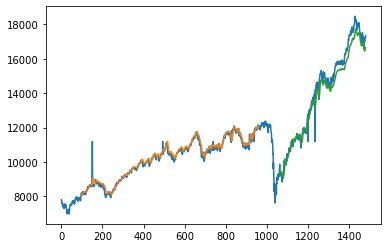

In [87]:
look_back=100
trainpredictplot= numpy.empty_like(df2)
trainpredictplot[:, :]= np.nan
trainpredictplot[look_back:len(train_predict)+look_back, :] = train_predict

testpredictplot= numpy.empty_like(df2)
testpredictplot[:, :]= np.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df2))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()

In [93]:
x_input = test_data[419:].reshape(1,-1)

In [94]:
x_input.shape

(1, 100)

In [95]:
temp_input= list(x_input)
temp_input = temp_input[0].tolist()

In [96]:
temp_input

[0.807168966162769,
 0.8090678670142959,
 0.8092547527064387,
 0.8163942602108136,
 0.8307079024048687,
 0.8336585231423443,
 0.8381385169666917,
 0.8341624863678216,
 0.8238769854552896,
 0.8278703297337198,
 0.839007594693221,
 0.8398810857702605,
 0.8400766282587295,
 0.8460123272750133,
 0.8656405834786125,
 0.8831219461978026,
 0.8782595241928433,
 0.8919822954756758,
 0.8997561277775998,
 0.9044666309112968,
 0.9031020770247364,
 0.9023547041608606,
 0.9037235015801439,
 0.9025112060266065,
 0.9046577601361625,
 0.9167769811576392,
 0.9263412494130616,
 0.9224869236768445,
 0.9061265354749357,
 0.9204749747589909,
 0.9191409744297079,
 0.9431534901577951,
 0.9457824502805454,
 0.9459476089426175,
 0.9366919311550834,
 0.9334503730910397,
 0.9253548801743903,
 0.9178721548430069,
 0.9317078043743785,
 0.943097135855512,
 0.9277752276618345,
 0.9403203306633421,
 0.9494325767319673,
 0.9538431461941022,
 0.9578409037361357,
 0.9725979114075691,
 0.987963273487573,
 1.0,
 0.99493320

In [97]:
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        print("{} dat input {}". format(i,x_input))
        x_input= x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}". format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input= temp_input[1:]
        lst_output.extend(yhat.tolist())
        i= i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat= model.predict(x_input, verbose= 0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)

[0.84956187]
101
1 dat input [0.80906787 0.80925475 0.81639426 0.8307079  0.83365852 0.83813852
 0.83416249 0.82387699 0.82787033 0.83900759 0.83988109 0.84007663
 0.84601233 0.86564058 0.88312195 0.87825952 0.8919823  0.89975613
 0.90446663 0.90310208 0.9023547  0.9037235  0.90251121 0.90465776
 0.91677698 0.92634125 0.92248692 0.90612654 0.92047497 0.91914097
 0.94315349 0.94578245 0.94594761 0.93669193 0.93345037 0.92535488
 0.91787215 0.9317078  0.94309714 0.92777523 0.94032033 0.94943258
 0.95384315 0.9578409  0.97259791 0.98796327 1.         0.99493321
 0.98171016 0.97401882 0.96852632 0.96943885 0.98186666 0.97687371
 0.94613449 0.93000445 0.95242665 0.9488894  0.94369666 0.95130992
 0.96449817 0.96238625 0.96003532 0.9475554  0.96747035 0.96805257
 0.95847099 0.94973251 0.93809994 0.90783431 0.9153778  0.90770395
 0.9182371  0.87393145 0.87632141 0.87017269 0.88613775 0.90653935
 0.8887275  0.86400665 0.88698934 0.91245773 0.91655105 0.91606882
 0.90363659 0.89986918 0.89087422

8 day output [[0.7784924]]
9 dat input [0.82787033 0.83900759 0.83988109 0.84007663 0.84601233 0.86564058
 0.88312195 0.87825952 0.8919823  0.89975613 0.90446663 0.90310208
 0.9023547  0.9037235  0.90251121 0.90465776 0.91677698 0.92634125
 0.92248692 0.90612654 0.92047497 0.91914097 0.94315349 0.94578245
 0.94594761 0.93669193 0.93345037 0.92535488 0.91787215 0.9317078
 0.94309714 0.92777523 0.94032033 0.94943258 0.95384315 0.9578409
 0.97259791 0.98796327 1.         0.99493321 0.98171016 0.97401882
 0.96852632 0.96943885 0.98186666 0.97687371 0.94613449 0.93000445
 0.95242665 0.9488894  0.94369666 0.95130992 0.96449817 0.96238625
 0.96003532 0.9475554  0.96747035 0.96805257 0.95847099 0.94973251
 0.93809994 0.90783431 0.9153778  0.90770395 0.9182371  0.87393145
 0.87632141 0.87017269 0.88613775 0.90653935 0.8887275  0.86400665
 0.88698934 0.91245773 0.91655105 0.91606882 0.90363659 0.89986918
 0.89087422 0.89322073 0.8703465  0.83810372 0.85171786 0.867761
 0.87794228 0.87195871 0.87

16 day output [[0.72768617]]
17 dat input [0.8919823  0.89975613 0.90446663 0.90310208 0.9023547  0.9037235
 0.90251121 0.90465776 0.91677698 0.92634125 0.92248692 0.90612654
 0.92047497 0.91914097 0.94315349 0.94578245 0.94594761 0.93669193
 0.93345037 0.92535488 0.91787215 0.9317078  0.94309714 0.92777523
 0.94032033 0.94943258 0.95384315 0.9578409  0.97259791 0.98796327
 1.         0.99493321 0.98171016 0.97401882 0.96852632 0.96943885
 0.98186666 0.97687371 0.94613449 0.93000445 0.95242665 0.9488894
 0.94369666 0.95130992 0.96449817 0.96238625 0.96003532 0.9475554
 0.96747035 0.96805257 0.95847099 0.94973251 0.93809994 0.90783431
 0.9153778  0.90770395 0.9182371  0.87393145 0.87632141 0.87017269
 0.88613775 0.90653935 0.8887275  0.86400665 0.88698934 0.91245773
 0.91655105 0.91606882 0.90363659 0.89986918 0.89087422 0.89322073
 0.8703465  0.83810372 0.85171786 0.867761   0.87794228 0.87195871
 0.8791286  0.89190404 0.89019627 0.88935758 0.90240257 0.84956187
 0.84684402 0.83920449 

24 day output [[0.67881984]]
25 dat input [0.91677698 0.92634125 0.92248692 0.90612654 0.92047497 0.91914097
 0.94315349 0.94578245 0.94594761 0.93669193 0.93345037 0.92535488
 0.91787215 0.9317078  0.94309714 0.92777523 0.94032033 0.94943258
 0.95384315 0.9578409  0.97259791 0.98796327 1.         0.99493321
 0.98171016 0.97401882 0.96852632 0.96943885 0.98186666 0.97687371
 0.94613449 0.93000445 0.95242665 0.9488894  0.94369666 0.95130992
 0.96449817 0.96238625 0.96003532 0.9475554  0.96747035 0.96805257
 0.95847099 0.94973251 0.93809994 0.90783431 0.9153778  0.90770395
 0.9182371  0.87393145 0.87632141 0.87017269 0.88613775 0.90653935
 0.8887275  0.86400665 0.88698934 0.91245773 0.91655105 0.91606882
 0.90363659 0.89986918 0.89087422 0.89322073 0.8703465  0.83810372
 0.85171786 0.867761   0.87794228 0.87195871 0.8791286  0.89190404
 0.89019627 0.88935758 0.90240257 0.84956187 0.84684402 0.83920449
 0.8290292  0.81799752 0.80707765 0.79674935 0.78720713 0.77849239
 0.7705614  0.763324

In [99]:
day_new=np.arange(1,101)
day_ped=np.arange(101,131)

In [100]:
import matplotlib.pyplot as plt

In [101]:
len(df2)

1481

In [103]:
df3= df2.tolist()
df3.extend(lst_output)

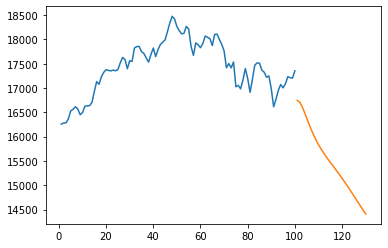

In [105]:
plt.plot(day_new,scaler.inverse_transform(df2[1381:]))
plt.plot(day_ped,scaler.inverse_transform(lst_output))

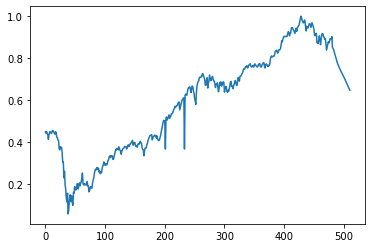

In [106]:
df3=df2.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])